In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,3,8)

In [3]:
gme = web.DataReader("GME",'yahoo',start, end)
amc = web.DataReader("AMC",'yahoo',start, end)

In [4]:
gme.to_csv('GME_stock.csv')
amc.to_csv('AMC_stock.csv')

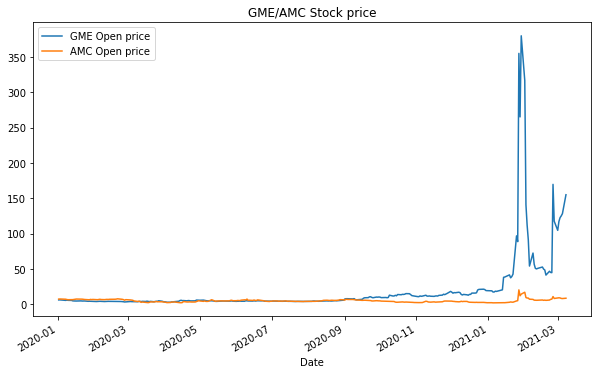

In [5]:
gme['Open'].plot(label = 'GME Open price', figsize=(10,6))
amc['Open'].plot(label = 'AMC Open price')
plt.legend()
plt.title('GME/AMC Stock price')
plt.show()

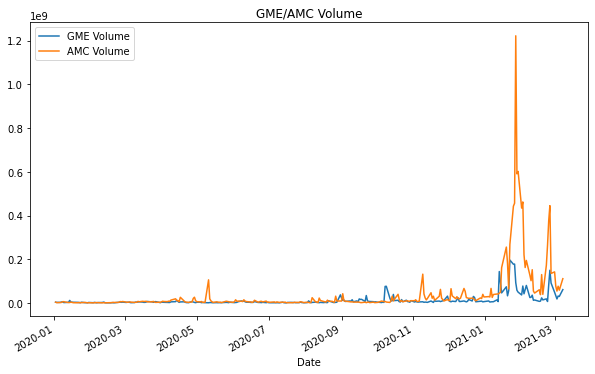

In [6]:
gme['Volume'].plot(label = 'GME Volume', figsize=(10,6))
amc['Volume'].plot(label = 'AMC Volume')
plt.legend()
plt.title('GME/AMC Volume')
plt.show()

In [7]:
gme.iloc[[gme['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-22,76.760002,42.32,42.59,65.010002,197157900,65.010002


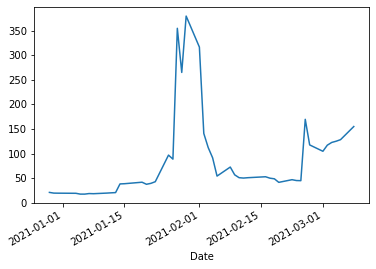

In [8]:
gme.iloc[250:350]['Open'].plot()

### GME and AMC total money traded

In [9]:
gme['Total Traded'] = gme['Open']*gme['Volume']
amc['Total Traded'] = amc['Open']*amc['Volume']

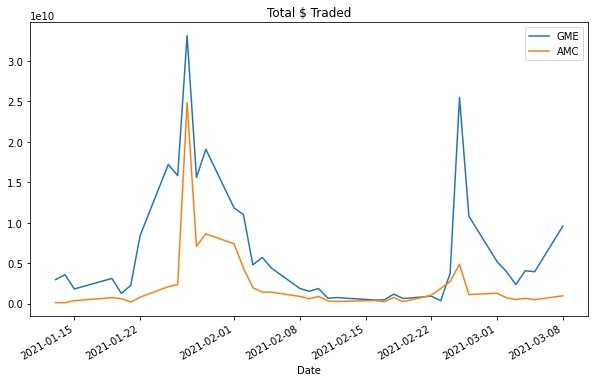

In [10]:
gme.iloc[260:350]['Total Traded'].plot(label='GME', figsize=(10,6))
amc.iloc[260:350]['Total Traded'].plot(label='AMC', figsize=(10,6))
plt.legend()
plt.title('Total $ Traded')
plt.show()

# Moving Averages

Text(0.5, 1.0, 'GME: Moving avg (10day) and open price')

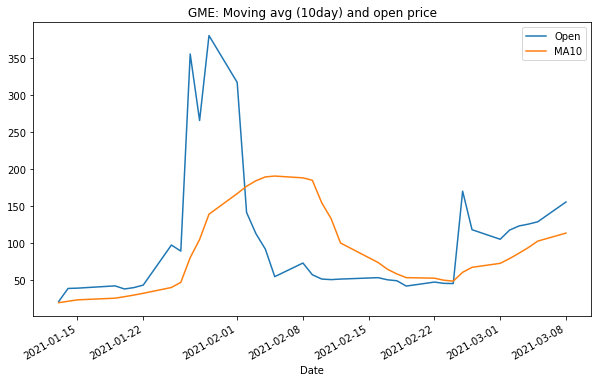

In [11]:
# rolling 10 day avg
gme.iloc[260:350]['Open'].plot(figsize=(10,6))
gme['MA10'] = gme['Open'].rolling(10).mean()
gme.iloc[260:350]['MA10'].plot(label='MA10')
plt.legend()
plt.title('GME: Moving avg (10day) and open price')

# Scatter Matrix

In [12]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [13]:
comp = pd.concat([gme['Open'],amc['Open']], axis=1)
comp.columns = ['GME Open','AMC Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFDB09B7F0>,
      dtype=object)

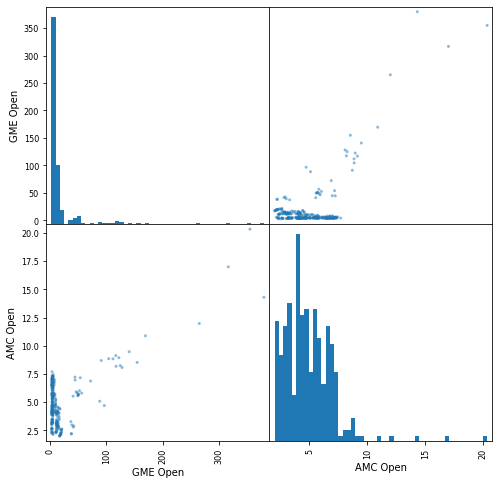

In [14]:
scatter_matrix(comp, figsize=(8,8),hist_kwds={'bins':50})

# Candlestick charts

Note: you may need to restart the kernel to use updated packages.


In [21]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [ ]:
#left off in vid at 34:10
#gme_reset = 